# Import  

In [11]:
# Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sklearn # we are currenlty not using this one, delete?
import os 
import IPython.display as ipd
import scipy.signal 
import scipy.io.wavfile as wavfile





In [12]:
# Import data 
ravdessPath = "./ravdess_data/audio_speech_actors_01-24/"
ravdessFiles = os.listdir(ravdessPath)
print(ravdessFiles)


['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [13]:
# Create data frame
ravdess_dataframe = pd.DataFrame(columns=['path','actor', 'gender', 'emotion','emotion_label'])
count = 0

# Loop through every actor
for actor in ravdessFiles:
    actorAudioFiles = os.listdir(ravdessPath + actor)
    # Loop trough every audio file for the actor
    for audioFile in actorAudioFiles:
        nm = audioFile.split('.')[0].split('-')
        path = ravdessPath + actor + '/' + audioFile
        src = int(nm[1])
        actorNum = int(nm[-1])
        emotion = int(nm[2])

        # get actors gender
        if int(actorNum)%2 == 0:
            gender = "female"
        else:
            gender = "male"

        # Get emotion in audio file
        if emotion == 1:
            lb = "neutral"
        elif emotion == 2:
            lb = "calm"
        elif emotion == 3:
            lb = "happy"
        elif emotion == 4:
            lb = "sad"
        elif emotion == 5:
            lb = "angry"
        elif emotion == 6:
            lb = "fearful"
        elif emotion == 7:
            lb = "disgust"
        elif emotion == 8:
            lb = "surprised"
        else:
            lb = "none"

        ravdess_dataframe.loc[count] = [path,actor, gender, emotion,lb]
        count += 1

ravdess_dataframe.sort_values(by='path',inplace=True)
ravdess_dataframe.index =  range(len(ravdess_dataframe.index))
ravdess_dataframe.head(20)


,path,actor,gender,emotion,emotion_label
0,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral
1,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral
2,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral
3,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral
4,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
5,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
6,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
7,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
8,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
9,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm


# Plot audio



C:\Users\Julia\AppData\Local\Temp\ipykernel_21244\960812109.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, aud = wavfile.read(filename)
c:\Users\Julia\Documents\source\DA150X\speech-emotion-recognization-gender-gap\virtualEnvironment\lib\site-packages\matplotlib\axes\_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


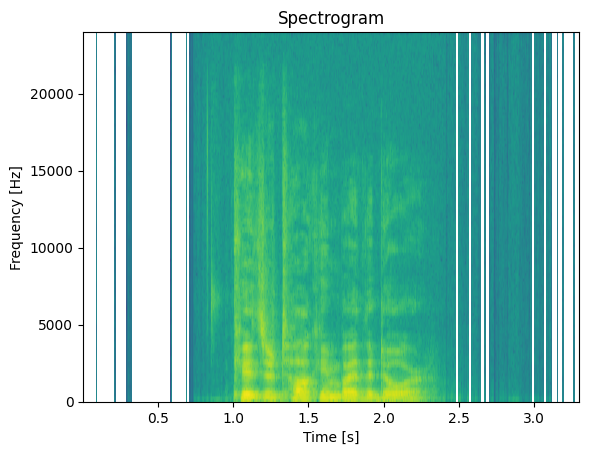

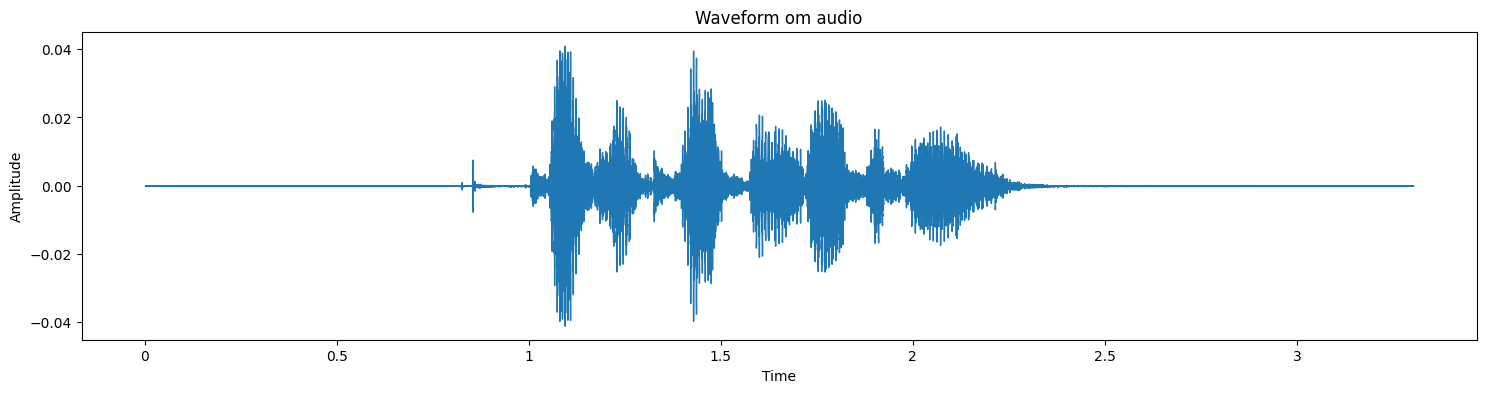

In [14]:

filename = ravdess_dataframe.path[0]

# Plot spectogram
Fs, aud = wavfile.read(filename)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud, Fs=Fs)
plt.title("Spectrogram")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.show()

# Plotting Wave 
audio, samplingRate = librosa.load(filename)
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform om audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveshow(audio, sr=samplingRate)
fig.subplots_adjust(hspace=.5)

# Lists of feature values

In [39]:
zeroCrossingVals= [0]*1440
rmseMeanVals= [0]*1440
spectralCentroidMeanVals= [0]*1440
spectralRolloffMeanVals= [0]*1440
spectralContrastMeanVals= [0]*1440
spectralFlatnessMeanVals= [0]*1440
spectralBandwidthMeanVals= [0]*1440
rmseMedianVals= [0]*1440
spectralCentroidMedianVals= [0]*1440
spectralRolloffMedianVals= [0]*1440
spectralContrastMedianVals= [0]*1440
spectralFlatnessMedianVals= [0]*1440
spectralBandwidthMedianVals= [0]*1440
rmseSDVals= [0]*1440
spectralCentroidSDVals= [0]*1440
spectralRolloffSDVals= [0]*1440
spectralContrastSDVals= [0]*1440
spectralFlatnessSDVals= [0]*1440
spectralBandwidthSDVals= [0]*1440
mfcc1ValsMean = [0]*1440
mfcc2ValsMean = [0]*1440
mfcc3ValsMean = [0]*1440
mfcc4ValsMean = [0]*1440
mfcc5ValsMean = [0]*1440
mfcc6ValsMean = [0]*1440
mfcc7ValsMean = [0]*1440
mfcc8ValsMean = [0]*1440
mfcc9ValsMean = [0]*1440
mfcc10ValsMean = [0]*1440
mfcc11ValsMean = [0]*1440
mfcc12ValsMean = [0]*1440
mfcc13ValsMean = [0]*1440
mfcc14ValsMean = [0]*1440
mfcc15ValsMean = [0]*1440
mfcc16ValsMean = [0]*1440
mfcc17ValsMean = [0]*1440
mfcc18ValsMean = [0]*1440
mfcc19ValsMean = [0]*1440
mfcc20ValsMean = [0]*1440

mfcc1ValsMedian = [0]*1440
mfcc2ValsMedian = [0]*1440
mfcc3ValsMedian = [0]*1440
mfcc4ValsMedian = [0]*1440
mfcc5ValsMedian = [0]*1440
mfcc6ValsMedian = [0]*1440
mfcc7ValsMedian = [0]*1440
mfcc8ValsMedian = [0]*1440
mfcc9ValsMedian = [0]*1440
mfcc10ValsMedian = [0]*1440
mfcc11ValsMedian = [0]*1440
mfcc12ValsMedian = [0]*1440
mfcc13ValsMedian = [0]*1440
mfcc14ValsMedian = [0]*1440
mfcc15ValsMedian = [0]*1440
mfcc16ValsMedian = [0]*1440
mfcc17ValsMedian = [0]*1440
mfcc18ValsMedian = [0]*1440
mfcc19ValsMedian = [0]*1440
mfcc20ValsMedian = [0]*1440

mfcc1ValsSD = [0]*1440
mfcc2ValsSD = [0]*1440
mfcc3ValsSD = [0]*1440
mfcc4ValsSD = [0]*1440
mfcc5ValsSD = [0]*1440
mfcc6ValsSD = [0]*1440
mfcc7ValsSD = [0]*1440
mfcc8ValsSD = [0]*1440
mfcc9ValsSD = [0]*1440
mfcc10ValsSD = [0]*1440
mfcc11ValsSD = [0]*1440
mfcc12ValsSD = [0]*1440
mfcc13ValsSD = [0]*1440
mfcc14ValsSD = [0]*1440
mfcc15ValsSD = [0]*1440
mfcc16ValsSD = [0]*1440
mfcc17ValsSD = [0]*1440
mfcc18ValsSD = [0]*1440
mfcc19ValsSD = [0]*1440
mfcc20ValsSD = [0]*1440



# Loop files

In [48]:
for index, file in ravdess_dataframe.iterrows():
    # Load the file 
    filename = file.path
    audio, samplingRate = librosa.load(filename)

    # trim audio
    audioTrimmed = trimAudio(audio, samplingRate, filename)
    duration = len(audioTrimmed)/samplingRate

    # remove noise
    audioNoNoise = removeNoise(audioTrimmed, samplingRate, filename)

    # FEATURE EXTRACTION 

    # zero crossing rate
    zero_crossing = zeroCrossingRate(audioNoNoise, samplingRate)
    #print("Zero crossing rate")
    #print(sum(zero_crossing)/duration) # zero crossings / seconds
    vall = np.sum(zero_crossing)/duration
    zeroCrossingVals[index] = vall

    # rmse
    rmse = RMSE(audioNoNoise, samplingRate, filename)
    #print("mean of RMSE") # rmse / frame
    #print(np.mean(rmse[0])) 
    rmseMeanVals[index] = np.mean(rmse[0])
    rmseMedianVals[index] = np.median(rmse[0])
    rmseSDVals[index] = np.std(rmse[0])
   

    # spectral centroid
    spectral_centroids = spectralCentroid(audioNoNoise, samplingRate, filename)
    #print("mean of spectral centroid")
    #print(np.mean(spectral_centroids))
    spectralCentroidMeanVals[index] = np.mean(spectral_centroids)
    spectralCentroidMedianVals[index] = np.median(spectral_centroids)
    spectralCentroidSDVals[index] = np.std(spectral_centroids)

    
    # spectral rolloff
    spectral_rolloff = spectralRolloff(audioNoNoise, samplingRate, filename)
    # print("mean of spectral rolloff")
    # print(np.mean(spectral_rolloff))
    spectralRolloffMeanVals[index] = np.mean(spectral_rolloff)
    spectralRolloffMedianVals[index] = np.median(spectral_rolloff)
    spectralRolloffSDVals[index] = np.std(spectral_rolloff)


    # specral contrast
    spectral_contrast = spectralContrast(audioNoNoise, samplingRate, filename)
    # print("mean of spectral contrast")
    # print(np.mean(spectral_contrast))
    spectralContrastMeanVals[index] = np.mean(spectral_contrast)
    spectralContrastMedianVals[index] = np.median(spectral_contrast)
    spectralContrastSDVals[index] = np.std(spectral_contrast)


    # spectral flatness
    spectral_flatness = spectralFlatness(audioNoNoise, samplingRate, filename)
    # print("mean of spectral flatness")
    # print(np.mean(spectral_flatness))
    spectralFlatnessMeanVals[index] = np.mean(spectral_flatness)
    spectralFlatnessMedianVals[index] = np.median(spectral_flatness)
    spectralFlatnessSDVals[index] = np.std(spectral_flatness)


    # spectral bandwidth
    spectral_bandwidth = spectralBandwidth(audioNoNoise, samplingRate, filename)
    # print("mean of spectral bandwisth")
    # print(np.mean(spectral_bandwidth))
    spectralBandwidthMeanVals[index] = np.mean(spectral_bandwidth)
    spectralBandwidthMedianVals[index] = np.median(spectral_bandwidth)
    spectralBandwidthSDVals[index] = np.std(spectral_bandwidth)


    # MFCC
    mfcc = MFCC(audioNoNoise, samplingRate, filename)
    #print(mfcc.shape)

    row_mean = [0]*len(mfcc)
    row_median = [0]*len(mfcc)
    row_sd = [0]*len(mfcc)
    i=0
    for row in mfcc:
        mean= np.mean(row)
        median = np.median(row)
        std = np.std(row)
        row_mean[i] = mean
        row_median[i] = median
        row_sd[i] = std
        i+=i


    mfcc1ValsMean[index] = row_mean[0]
    mfcc2ValsMean[index] = row_mean[1] 
    mfcc3ValsMean[index] = row_mean[2] 
    mfcc4ValsMean[index] = row_mean[3] 
    mfcc5ValsMean[index] = row_mean[4]         
    mfcc6ValsMean[index] = row_mean[5]
    mfcc7ValsMean[index] = row_mean[6] 
    mfcc8ValsMean[index] = row_mean[7] 
    mfcc9ValsMean[index] = row_mean[8] 
    mfcc10ValsMean[index] = row_mean[9]   
    mfcc11ValsMean[index] = row_mean[10]
    mfcc12ValsMean[index] = row_mean[11] 
    mfcc13ValsMean[index] = row_mean[12] 
    mfcc14ValsMean[index] = row_mean[13] 
    mfcc15ValsMean[index] = row_mean[14]   
    mfcc16ValsMean[index] = row_mean[15]
    mfcc17ValsMean[index] = row_mean[16] 
    mfcc18ValsMean[index] = row_mean[17] 
    mfcc19ValsMean[index] = row_mean[18] 
    mfcc20ValsMean[index] = row_mean[19]   

    mfcc1ValsMedian[index] = row_median[0]
    mfcc2ValsMedian[index] = row_median[1] 
    mfcc3ValsMedian[index] = row_median[2] 
    mfcc4ValsMedian[index] = row_median[3] 
    mfcc5ValsMedian[index] = row_median[4]         
    mfcc6ValsMedian[index] = row_median[5]
    mfcc7ValsMedian[index] = row_median[6] 
    mfcc8ValsMedian[index] = row_median[7] 
    mfcc9ValsMedian[index] = row_median[8] 
    mfcc10ValsMedian[index] = row_median[9]   
    mfcc11ValsMedian[index] = row_median[10]
    mfcc12ValsMedian[index] = row_median[11] 
    mfcc13ValsMedian[index] = row_median[12] 
    mfcc14ValsMedian[index] = row_median[13] 
    mfcc15ValsMedian[index] = row_median[14]   
    mfcc16ValsMedian[index] = row_median[15]
    mfcc17ValsMedian[index] = row_median[16] 
    mfcc18ValsMedian[index] = row_median[17] 
    mfcc19ValsMedian[index] = row_median[18] 
    mfcc20ValsMedian[index] = row_median[19]  

    mfcc1ValsSD[index] = row_sd[0]
    mfcc2ValsSD[index] = row_sd[1] 
    mfcc3ValsSD[index] = row_sd[2] 
    mfcc4ValsSD[index] = row_sd[3] 
    mfcc5ValsSD[index] = row_sd[4]         
    mfcc6ValsSD[index] = row_sd[5]
    mfcc7ValsSD[index] = row_sd[6] 
    mfcc8ValsSD[index] = row_sd[7] 
    mfcc9ValsSD[index] = row_sd[8] 
    mfcc10ValsSD[index] = row_sd[9]   
    mfcc11ValsSD[index] = row_sd[10]
    mfcc12ValsSD[index] = row_sd[11] 
    mfcc13ValsSD[index] = row_sd[12] 
    mfcc14ValsSD[index] = row_sd[13] 
    mfcc15ValsSD[index] = row_sd[14]   
    mfcc16ValsSD[index] = row_sd[15]
    mfcc17ValsSD[index] = row_sd[16] 
    mfcc18ValsSD[index] = row_sd[17] 
    mfcc19ValsSD[index] = row_sd[18] 
    mfcc20ValsSD[index] = row_sd[19]  





# Create dataframe

In [49]:
ravdess_dataframe['zero crossing rate']=zeroCrossingVals
ravdess_dataframe['rmse mean'] = rmseMeanVals
ravdess_dataframe['spectral centroid mean'] = spectralCentroidMeanVals
ravdess_dataframe['spectral rolloff mean'] = spectralRolloffMeanVals
ravdess_dataframe['spectral contrast mean'] = spectralContrastMeanVals
ravdess_dataframe['spectral flatness mean'] = spectralFlatnessMeanVals
ravdess_dataframe['spectral bandwidth mean'] = spectralBandwidthMeanVals
ravdess_dataframe['rmse median'] = rmseMedianVals
ravdess_dataframe['spectral centroid median'] = spectralCentroidMedianVals
ravdess_dataframe['spectral rolloff median'] = spectralRolloffMedianVals
ravdess_dataframe['spectral contrast median'] = spectralContrastMedianVals
ravdess_dataframe['spectral flatness median'] = spectralFlatnessMedianVals
ravdess_dataframe['spectral bandwidth median'] = spectralBandwidthMedianVals
ravdess_dataframe['rmse sd'] = rmseSDVals
ravdess_dataframe['spectral centroid sd'] = spectralCentroidSDVals
ravdess_dataframe['spectral rolloff sd'] = spectralRolloffSDVals
ravdess_dataframe['spectral contrast sd'] = spectralContrastSDVals
ravdess_dataframe['spectral flatness sd'] = spectralFlatnessSDVals
ravdess_dataframe['spectral bandwidth sd'] = spectralBandwidthSDVals
ravdess_dataframe['mfcc1Mean'] = mfcc1ValsMean
ravdess_dataframe['mfcc2Mean'] = mfcc2ValsMean
ravdess_dataframe['mfcc3Mean'] = mfcc3ValsMean
ravdess_dataframe['mfcc4Mean'] = mfcc4ValsMean
ravdess_dataframe['mfcc5Mean'] = mfcc5ValsMean
ravdess_dataframe['mfcc6Mean'] = mfcc6ValsMean
ravdess_dataframe['mfcc7Mean'] = mfcc7ValsMean
ravdess_dataframe['mfcc8Mean'] = mfcc8ValsMean
ravdess_dataframe['mfcc9Mean'] = mfcc9ValsMean
ravdess_dataframe['mfcc10Mean'] = mfcc10ValsMean
ravdess_dataframe['mfcc11Mean'] = mfcc11ValsMean
ravdess_dataframe['mfcc12Mean'] = mfcc12ValsMean
ravdess_dataframe['mfcc13Mean'] = mfcc13ValsMean
ravdess_dataframe['mfcc14Mean'] = mfcc14ValsMean
ravdess_dataframe['mfcc15Mean'] = mfcc15ValsMean
ravdess_dataframe['mfcc16Mean'] = mfcc16ValsMean
ravdess_dataframe['mfcc17Mean'] = mfcc17ValsMean
ravdess_dataframe['mfcc18Mean'] = mfcc18ValsMean
ravdess_dataframe['mfcc19Mean'] = mfcc19ValsMean
ravdess_dataframe['mfcc20Mean'] = mfcc20ValsMean

ravdess_dataframe['mfcc1Median'] = mfcc1ValsMedian
ravdess_dataframe['mfcc2Median'] = mfcc2ValsMedian
ravdess_dataframe['mfcc3Median'] = mfcc3ValsMedian
ravdess_dataframe['mfcc4Median'] = mfcc4ValsMedian
ravdess_dataframe['mfcc5Median'] = mfcc5ValsMedian
ravdess_dataframe['mfcc6Median'] = mfcc6ValsMedian
ravdess_dataframe['mfcc7Median'] = mfcc7ValsMedian
ravdess_dataframe['mfcc8Median'] = mfcc8ValsMedian
ravdess_dataframe['mfcc9Median'] = mfcc9ValsMedian
ravdess_dataframe['mfcc10Median'] = mfcc10ValsMedian
ravdess_dataframe['mfcc11Median'] = mfcc11ValsMedian
ravdess_dataframe['mfcc12Median'] = mfcc12ValsMedian
ravdess_dataframe['mfcc13Median'] = mfcc13ValsMedian
ravdess_dataframe['mfcc14Median'] = mfcc14ValsMedian
ravdess_dataframe['mfcc15Median'] = mfcc15ValsMedian
ravdess_dataframe['mfcc16Median'] = mfcc16ValsMedian
ravdess_dataframe['mfcc17Median'] = mfcc17ValsMedian
ravdess_dataframe['mfcc18Median'] = mfcc18ValsMedian
ravdess_dataframe['mfcc19Median'] = mfcc19ValsMedian
ravdess_dataframe['mfcc20Median'] = mfcc20ValsMedian


ravdess_dataframe['mfcc1SD'] = mfcc1ValsSD
ravdess_dataframe['mfcc2SD'] = mfcc2ValsSD
ravdess_dataframe['mfcc3SD'] = mfcc3ValsSD
ravdess_dataframe['mfcc4SD'] = mfcc4ValsSD
ravdess_dataframe['mfcc5SD'] = mfcc5ValsSD
ravdess_dataframe['mfcc6SD'] = mfcc6ValsSD
ravdess_dataframe['mfcc7SD'] = mfcc7ValsSD
ravdess_dataframe['mfcc8SD'] = mfcc8ValsSD
ravdess_dataframe['mfcc9SD'] = mfcc9ValsSD
ravdess_dataframe['mfcc10SD'] = mfcc10ValsSD
ravdess_dataframe['mfcc11SD'] = mfcc11ValsSD
ravdess_dataframe['mfcc12SD'] = mfcc12ValsSD
ravdess_dataframe['mfcc13SD'] = mfcc13ValsSD
ravdess_dataframe['mfcc14SD'] = mfcc14ValsSD
ravdess_dataframe['mfcc15SD'] = mfcc15ValsSD
ravdess_dataframe['mfcc16SD'] = mfcc16ValsSD
ravdess_dataframe['mfcc17SD'] = mfcc17ValsSD
ravdess_dataframe['mfcc18SD'] = mfcc18ValsSD
ravdess_dataframe['mfcc19SD'] = mfcc19ValsSD
ravdess_dataframe['mfcc20SD'] = mfcc20ValsSD





ravdess_dataframe.head(20)


,path,actor,gender,emotion,emotion_label,zero crossing rate,rmse mean,spectral centroid mean,spectral rolloff mean,spectral contrast mean,...,mfcc11SD,mfcc12SD,mfcc13SD,mfcc14SD,mfcc15SD,mfcc16SD,mfcc17SD,mfcc18SD,mfcc19SD,mfcc20SD
0,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral,1435.803223,0.005542,1506.746296,2745.483398,29.331316,...,0,0,0,0,0,0,0,0,0,0
1,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral,1327.368164,0.005980,1509.039907,2843.516139,30.130392,...,0,0,0,0,0,0,0,0,0,0
2,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral,1756.326349,0.006919,1567.752543,2816.427612,28.600011,...,0,0,0,0,0,0,0,0,0,0
3,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral,1768.160377,0.006493,1617.132562,2961.812337,29.823935,...,0,0,0,0,0,0,0,0,0,0
4,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm,1706.586695,0.003638,1611.456921,2834.782858,27.880418,...,0,0,0,0,0,0,0,0,0,0
5,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm,1295.581055,0.003677,1408.288751,2577.052453,29.727503,...,0,0,0,0,0,0,0,0,0,0
6,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm,1860.593580,0.005520,1563.120697,2799.470215,29.799908,...,0,0,0,0,0,0,0,0,0,0
7,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm,1554.305753,0.005871,1484.832071,2696.310561,31.427399,...,0,0,0,0,0,0,0,0,0,0
8,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm,1200.825639,0.003035,1412.098684,2568.662673,29.666006,...,0,0,0,0,0,0,0,0,0,0
9,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm,1898.793013,0.003021,1661.115213,2831.018066,26.856060,...,0,0,0,0,0,0,0,0,0,0


# Creating training and testing data

### testing data

In [50]:
# creating testing data

# each actor has 4 neutral emotion samples, and 8 of the other 7 emotions (4+7*8 = 60 samples in total)
# we will remove 15 samples from each actor which is done by removing 1 neutral sample and 2 samples for each of the other emotions (1+2*7=15)
# this is done by taking each fourth row in the dataframe as the tesing data 

ravdess_dataframe_testing = ravdess_dataframe.iloc[::4, :]

#remove useless columns
ravdess_dataframe_testing = ravdess_dataframe_testing.drop(columns=['path', 'actor', 'gender', 'emotion_label'])

#seperate Y and X values
Y_testing = ravdess_dataframe_testing['emotion']
X_testing = ravdess_dataframe_testing.drop(columns='emotion')


# training data
ravdess_dataframe_training = ravdess_dataframe[ravdess_dataframe.index % 4 != 0]

# male and female training data
ravdess_dataframe_training_female = ravdess_dataframe_training[ravdess_dataframe_training['gender'] == 'female']
ravdess_dataframe_training_male = ravdess_dataframe_training[ravdess_dataframe_training['gender'] == 'male']


### Training data 25% female 75% male

In [51]:
# remove 180 female samples
# remove 30 samples from each female
# actors with even numbers are female
# remove every second row for each female actor
ravdess_dataframe_training_female_25percentage = ravdess_dataframe_training_female[ravdess_dataframe_training_female.index % 2 == 0]
ravdess_dataframe_training_female_25percentage.head()

#make into same dataframe
ravdess_dataframe_training_maleBias = ravdess_dataframe_training_male.append(ravdess_dataframe_training_female_25percentage)
ravdess_dataframe_training_maleBias.head()

#remove useless columns
ravdess_dataframe_training_maleBias = ravdess_dataframe_training_maleBias.drop(columns=['path', 'actor', 'gender', 'emotion_label'])
ravdess_dataframe_training_maleBias.head()

#seperate Y and X values
Y_training_maleBias = ravdess_dataframe_training_maleBias['emotion']
X_training_maleBias = ravdess_dataframe_training_maleBias.drop(columns='emotion')



C:\Users\Julia\AppData\Local\Temp\ipykernel_21244\1460088473.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ravdess_dataframe_training_maleBias = ravdess_dataframe_training_male.append(ravdess_dataframe_training_female_25percentage)


### Training data 75% female 25% male

In [52]:
ravdess_dataframe_training_male_25percentage = ravdess_dataframe_training_male[ravdess_dataframe_training_male.index % 2 == 0]
ravdess_dataframe_training_male_25percentage.head()

#make into same dataframe
ravdess_dataframe_training_femaleBias = ravdess_dataframe_training_female.append(ravdess_dataframe_training_male_25percentage)
ravdess_dataframe_training_femaleBias.head()

#remove useless columns
ravdess_dataframe_training_femaleBias = ravdess_dataframe_training_femaleBias.drop(columns=['path', 'actor', 'gender', 'emotion_label'])
ravdess_dataframe_training_femaleBias.head()

#seperate Y and X values
Y_training_femaleBias = ravdess_dataframe_training_femaleBias['emotion']
X_training_femaleBias = ravdess_dataframe_training_femaleBias.drop(columns='emotion')


C:\Users\Julia\AppData\Local\Temp\ipykernel_21244\63576578.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ravdess_dataframe_training_femaleBias = ravdess_dataframe_training_female.append(ravdess_dataframe_training_male_25percentage)


### Training data 50% female 50% male

In [53]:
#make into same dataframe
ravdess_dataframe_training_noBias = ravdess_dataframe_training_male.append(ravdess_dataframe_training_female)

#remove useless columns
ravdess_dataframe_training_noBias = ravdess_dataframe_training_noBias.drop(columns=['path', 'actor', 'gender', 'emotion_label'])

#seperate Y and X values
Y_training_noBias = ravdess_dataframe_training_noBias['emotion']
X_training_noBias = ravdess_dataframe_training_noBias.drop(columns='emotion')



C:\Users\Julia\AppData\Local\Temp\ipykernel_21244\2220101973.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ravdess_dataframe_training_noBias = ravdess_dataframe_training_male.append(ravdess_dataframe_training_female)


### Training data 50% female 50% male with equal amount data as the biased ones

In [68]:
# we want to remove 180 samples 
# --> remove 90 female samples and 90 male samples
# done by removing random rows
from numpy.random import default_rng

arr_indices_top_drop = default_rng().choice(ravdess_dataframe_training_male.index, size=90, replace=False)
ravdess_dataframe_training_male_minus90 = ravdess_dataframe_training_male.drop(index=arr_indices_top_drop)

arr_indices_top_drop = default_rng().choice(ravdess_dataframe_training_female.index, size=90, replace=False)
ravdess_dataframe_training_female_minus90 = ravdess_dataframe_training_female.drop(index=arr_indices_top_drop)

#make into same dataframe
ravdess_dataframe_training_noBias_minus180 = ravdess_dataframe_training_male_minus90.append(ravdess_dataframe_training_female_minus90)

#remove useless columns
ravdess_dataframe_training_noBias_minus180 = ravdess_dataframe_training_noBias_minus180.drop(columns=['path', 'actor', 'gender', 'emotion_label'])

#seperate Y and X values
Y_training_noBias_minus180 = ravdess_dataframe_training_noBias_minus180['emotion']
X_training_noBias_minus180 = ravdess_dataframe_training_noBias_minus180.drop(columns='emotion')




C:\Users\Julia\AppData\Local\Temp\ipykernel_21244\4218334344.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ravdess_dataframe_training_noBias_minus180 = ravdess_dataframe_training_male_minus90.append(ravdess_dataframe_training_female_minus90)


In [48]:
X_train_noMFCC = X_training_noBias.drop(columns=['mfcc1','mfcc2', 'mfcc3', 'mfcc4','mfcc5', 'mfcc6', 'mfcc7','mfcc8', 'mfcc9', 'mfcc10','mfcc111', 'mfcc12', 'mfcc13','mfcc14', 'mfcc15', ])
X_train_noMFCC = X_training_noBias.drop(columns=['mfcc16','mfcc17', 'mfcc18', 'mfcc19','mfcc20'])
X_testing_nomfcc = X_testing.drop(columns=['mfcc16','mfcc17', 'mfcc18', 'mfcc19','mfcc20'])

# Classification

In [70]:
# import models from sklearn
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier



#random state
random = 4

classifiers = {
    "K-neighbours": KNeighborsClassifier(),
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(random_state=random),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random),
    "Extremely random forest": ExtraTreesClassifier(random_state=random),
    "Adaboost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(random_state=random),
    "MLP": MLPClassifier(max_iter=2000, hidden_layer_sizes=(50,50)),
    "SVM (rbf)": SVC(),
    "SVM (polynomial)": SVC(kernel="poly"),
    "Ridge Classifier": RidgeClassifierCV()
}

for name, classifier in classifiers.items():
    classifier.fit(X_training_noBias_minus180, Y_training_noBias_minus180)
    y_predict = classifier.predict(X_testing)
    score = accuracy_score(Y_testing, y_predict)
    #print(f"{name} scored {score}")
    print(score)

0.3111111111111111
0.39166666666666666
0.6083333333333333
0.5361111111111111
0.6444444444444445
0.2972222222222222
0.5083333333333333
0.2222222222222222
0.28888888888888886
0.275
0.5


# Functions:

# Trim Audio


In [1]:
# Trim audio using librosa trim tool, remove if less than 25 db

def trimAudio(audio, samplingRate, filename):
    audioTrim, index = librosa.effects.trim(audio, top_db=25)

    # # plot spectogram of trimmed audio
    # Fs, aud = wavfile.read(filename)
    # powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(audioTrim, Fs=Fs)
    # plt.title("Spectrogram of trimmed audio")
    # plt.ylabel("Frequency [Hz]")
    # plt.xlabel("Time [s]")
    # plt.show()

    # #plot wavefunction of trimmed audio
    # fig = plt.figure(figsize=(18, 10))
    # ax1 = fig.add_subplot(211)
    # ax1.set_title('Waveform of trimmed audio')
    # ax1.set_ylabel('Amplitude')
    # librosa.display.waveshow(audioTrim, sr=samplingRate)
    # fig.subplots_adjust(hspace=.5)

    return audioTrim


# Remove noise


In [2]:
# remove noise using wiener filter 
def removeNoise(audio, samplingRate, filename):
    return scipy.signal.wiener(audio)

# Feature extraction

### Zero crossing rate

In [3]:
def zeroCrossingRate(audio, samplingRate):
    return librosa.zero_crossings(audio)


### Root mean square energy

In [4]:
def RMSE(audio, samplingRate, filename):

    rmse = librosa.feature.rms(y=audio)

    # Fs, aud = wavfile.read(filename) 
    # duration = len(audio)/samplingRate # time in seconds
    # time = np.arange(0,duration,1/samplingRate) #time vector
    # frames = librosa.time_to_frames(duration)
    # timeframes = np.arange(0,duration+duration/frames, duration/frames)

    # # Plotting Wave Form with rmse
    # fig = plt.figure(figsize=(18, 10))
    # ax1 = fig.add_subplot(211)
    # ax1.set_title('RMSE of the Audio')
    # ax1.set_ylabel('Amplitude')
    # librosa.display.waveshow(audio, sr=samplingRate)
    # plt.plot(timeframes,rmse[0], color='r')
    # fig.subplots_adjust(hspace=.5)

    print("rmse")
    print(rmse.shape)

    return rmse


### Spectral centroid

In [5]:
def spectralCentroid(audio, samplingRate, filename):
    spectral_centroid = librosa.feature.spectral_centroid(y = audio, sr=samplingRate)[0]
    # Plotting Wave Form and Spectrogram
    # frames = range(len(spectral_centroid))
    # time = librosa.frames_to_time(frames)
    # sc= sklearn.preprocessing.minmax_scale(spectral_centroid,axis=0)
    # fig = plt.figure(figsize=(18, 10))
    # ax1 = fig.add_subplot(211)
    # ax1.set_title('Spectral Centroid of the Audio')
    # ax1.set_ylabel('Amplitude')
    # librosa.display.waveshow(audio, sr=samplingRate)
    # plt.plot(time,sc, color='r')
    # fig.subplots_adjust(hspace=.5)

    print("spectral centroid")
    print(spectral_centroid.shape)


    return spectral_centroid



### Spectral rolloff

In [6]:
def spectralRolloff(audio, samplingRate, filename):
    spectral_rolloff = librosa.feature.spectral_rolloff(y = audio, sr=samplingRate)[0]
    # Plotting Wave Form and Spectrogram
    # frames = range(len(spectral_rolloff))
    # time = librosa.frames_to_time(frames)
    # sc= sklearn.preprocessing.minmax_scale(spectral_rolloff,axis=0)
    # fig = plt.figure(figsize=(18, 10))
    # ax1 = fig.add_subplot(211)
    # ax1.set_title('Spectral Rolloff of the Audio')
    # ax1.set_ylabel('Amplitude')
    # librosa.display.waveshow(audio, sr=samplingRate)
    # plt.plot(time,sc, color='r')
    # fig.subplots_adjust(hspace=.5)

    print("spectral roloff")
    print(spectral_rolloff.shape)


    return spectral_rolloff

### Spectral contrast

In [7]:
def spectralContrast(audio, samplingRate, filename):
    spectral_contrast = librosa.feature.spectral_contrast(y = audio, sr=samplingRate)[0]
    # Plotting Wave Form and Spectrogram
    # frames = range(len(spectral_contrast))
    # time = librosa.frames_to_time(frames)
    # sc= sklearn.preprocessing.minmax_scale(spectral_contrast,axis=0)
    # fig = plt.figure(figsize=(18, 10))
    # ax1 = fig.add_subplot(211)
    # ax1.set_title('Spectral Contrast of the Audio')
    # ax1.set_ylabel('Amplitude')
    # librosa.display.waveshow(audio, sr=samplingRate)
    # plt.plot(time,sc, color='r')
    # fig.subplots_adjust(hspace=.5)

    print("spectral contrast")
    print(spectral_contrast.shape)


    return spectral_contrast

### Spectral flatness

In [8]:
#

def spectralFlatness(audio, samplingRate, filename):
    spectral_flatness = librosa.feature.spectral_flatness(y = audio)[0]
    # Plotting Wave Form and Spectrogram
    # frames = range(len(spectral_flatness))
    # time = librosa.frames_to_time(frames)
    # sc= sklearn.preprocessing.minmax_scale(spectral_flatness,axis=0)
    # fig = plt.figure(figsize=(18, 10))
    # ax1 = fig.add_subplot(211)
    # ax1.set_title('Spectral Flatness of the Audio')
    # ax1.set_ylabel('Amplitude')
    # librosa.display.waveshow(audio, sr=samplingRate)
    # plt.plot(time,sc, color='r')
    # fig.subplots_adjust(hspace=.5)

    print("spectral flatness")
    print(spectral_flatness.shape)


    return spectral_flatness

### Spectral bandwidth

In [9]:
def spectralBandwidth(audio, samplingRate, filename):
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y = audio, sr=samplingRate)[0]
    # Plotting Wave Form and Spectrogram
    # frames = range(len(spectral_bandwidth))
    # time = librosa.frames_to_time(frames)
    # sc= sklearn.preprocessing.minmax_scale(spectral_bandwidth,axis=0)
    # fig = plt.figure(figsize=(18, 10))
    # ax1 = fig.add_subplot(211)
    # ax1.set_title('Spectral Bandwidth of the Audio')
    # ax1.set_ylabel('Amplitude')
    # librosa.display.waveshow(audio, sr=samplingRate)
    # plt.plot(time,sc, color='r')
    # fig.subplots_adjust(hspace=.5)

    print("spectral bandwidth")
    print(spectral_bandwidth.shape)


    return spectral_bandwidth

### Mel frequency cepstrum coefficients

In [10]:
# kmr få fram 39 para   metrar per frame. Så för varje parameter, ta medelvärde, median och standardavvikelse för alla frames så du får totalt 39x3 värden som alla blir olika features. 

def MFCC(audio, samplingRate, filename):
    # Plotting Mel Power Spectrogram
    # S_sample = librosa.feature.melspectrogram(y=audio, sr=samplingRate, n_mels=128,n_fft=2048,hop_length=512)

    # # Convert to log scale (dB). We'll use the peak power (max) as reference.
    # log_S_sample = librosa.amplitude_to_db(S_sample, ref=np.max)

    # plt.figure(figsize=(12, 4))
    # librosa.display.specshow(log_S_sample, sr=samplingRate, x_axis='time', y_axis='mel')
    # plt.title('Mel power spectrogram ')
    # plt.colorbar(format='%+02.0f dB')
    # plt.tight_layout()

    # Get MFCC
    mfcc = librosa.feature.mfcc(y=audio, sr=samplingRate)

    # plt.figure(figsize=(12, 4))
    # librosa.display.specshow(mfcc, sr=samplingRate, x_axis='time')
    # plt.ylabel('MFCC coeffs')
    # plt.xlabel('Time')
    # plt.title('MFCC of Audio')
    # plt.colorbar()
    # plt.tight_layout()

    return mfcc